In [3]:
## REQUIERE QUE ARCHIVOS DE ENTRADA Y DE PARAMETROS ESTEN EN LA MISMA CARPETA (o DIRECTORIO) 

## RESPETAR ORDEN DE COLUMNAS DATAFRAME

In [1]:
## IMPORTACION LIBRERIAS

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
import re
from unidecode import unidecode
from tqdm.notebook import trange, tqdm
import time
import math

In [3]:


## Lectura archivo de parámetros:
'''       '    como texto separador 
'''

os.listdir()     #Archivos de parámetros:   'CLAG1.par', 'localcap.run'

print(open("CLAG1.par", "r").read())
                                #print(f.readlines())     <-- En caso testear caracteres ocultos


'''     Para evitar errores futuros se utiliza RegEx (En función del separador y no de la posición)
        cada linea del archivo de parámetros tiene un   '     como separador 
        --> separación tipo:       VALOR PARAMËTRO    '    NOMBRE  PARÄMETRO
'''

open("CLAG1.par", "r").close()

Capping Test Copper Using BHID                                            '\header
D:\001_CLOCAL_GRP1\CLAG_MR2022.csv                                        '\input file
1,2,3,4,6,5,7,8                                                           '\columns for data, Record Number,x,y,z,code,grade,zone
30.,30.,30.                                                               '\initial search volume
6                                                                         '\Number of Risk Thresholds to consider (maximum of 6)
0.100,0.125,0.150,0.175,0.200,0.225                                       '\selected risk thresholds
21                                                                        '\number of data in local volume
21                                                                        '\number of units
1,2,10,11,13,14,16,19,20,22,23,31,32,34,35,36,37,50,51,52,53              '\unit names
0                                                                         '\do not con

In [4]:
l=[re.split("[']", x) for x in open("CLAG1.par", "r")]
    #print(x)
open("CLAG1.par", "r").close()            #cerrar archivo 


## diccionario de parámetros
param={}
param_l=[]
paran_v=[]

## OJO!! 
# Separador no es el mismo en todos los SO -->  Usar OS

l[0][1].strip() #     ==  os.sep


'\\header'

In [5]:
## header:          PARÁMETRO 1

param[1]=l[0][0].strip()
param_l.append(l[0][1].strip().replace(os.sep,""))

## input file:          PARÁMETRO 2

param[2]=l[1][0].strip().rsplit(os.sep, 1)[-1]
param_l.append(l[1][1].strip().replace(os.sep,""))

## columns for data:          PARÁMETRO 3

param[3]=[int(x) for x in l[2][0].strip().split(",")]
param_l.append(l[2][1].strip().replace(os.sep,"")[0:16])

## initial search volume:          PARÁMETRO 4

param[4]=[float(x) for x in l[3][0].strip().split(",")]
param_l.append(l[3][1].strip().replace(os.sep,""))

## Number of Risk Thresholds:          PARÁMETRO 5

param[5]=[int(x) for x in l[4][0].strip().split(",")]
param_l.append(l[4][1].strip().replace(os.sep,"")[0:37])

## Selected risk thresholds:          PARÁMETRO 6

param[6]=[float(x) for x in l[5][0].strip().split(",")]
param_l.append(l[5][1].strip().replace(os.sep,""))

## Number of data in local volume:          PARÁMETRO 7

param[7]=[int(x) for x in l[6][0].strip().split(",")]
param_l.append(l[6][1].strip().replace(os.sep,""))

## Number of units:          PARÁMETRO 8

param[8]=[int(x) for x in l[7][0].strip().split(",")]
param_l.append(l[7][1].strip().replace(os.sep,""))

## Unit names:          PARÁMETRO 9

param[9]=[int(x) for x in l[8][0].strip().split(",")]
param_l.append(l[8][1].strip().replace(os.sep,""))

## not consider values less than:          PARÁMETRO 10

param[10]=[int(x) for x in l[9][0].strip().split(",")]
param_l.append(l[9][1].strip().replace(os.sep,""))

## output files name:          PARÁMETRO 11

param[11]=l[10][0].strip().rsplit(os.sep, 1)[-1]
param_l.append(l[10][1].strip().replace(os.sep,""))

## number of zones:          PARÁMETRO 12

param[12]=[int(x) for x in l[11][0].strip().split(",")]
param_l.append(l[11][1].strip().replace(os.sep,""))

## zone identifiers:          PARÁMETRO 13

param[13]=[int(x) for x in l[12][0].strip().split(",")]
param_l.append(l[12][1].strip().replace(os.sep,""))

## azimuth of search orientation per zone :          PARÁMETRO 14

param[14]=[int(x) for x in l[13][0].strip().split(",")]
param_l.append(l[13][1].strip().replace(os.sep,""))

## Anisotropy ratios:          PARÁMETRO 15

param[15]=[float(x) for x in l[14][0].strip().split(",")]
param_l.append(l[14][1].strip().replace(os.sep,""))

## Exclude data from the same drillhole:          PARÁMETRO 16

param[16]=[int(x) for x in l[15][0].strip().split(",")]
param_l.append(l[15][1].strip().replace(os.sep,""))

## Option to weight data by search expansion:          PARÁMETRO 17

param[17]=[int(x) for x in l[16][0].strip().split(",")]
param_l.append(l[16][1].strip().replace(os.sep,""))


In [6]:
df_parametros = pd.DataFrame(list(zip(list(range(1,18)), param_l, list(param.values()))),
                             columns=['Orden','Descripcion', 'Valor']
                            )
df_parametros

,Orden,Descripcion,Valor
0,1,header,Capping Test Copper Using BHID
1,2,input file,CLAG_MR2022.csv
2,3,columns for data,"[1, 2, 3, 4, 6, 5, 7, 8]"
3,4,initial search volume,"[30.0, 30.0, 30.0]"
4,5,Number of Risk Thresholds to consider,[6]
5,6,selected risk thresholds,"[0.1, 0.125, 0.15, 0.175, 0.2, 0.225]"
6,7,number of data in local volume,[21]
7,8,number of units,[21]
8,9,unit names,"[1, 2, 10, 11, 13, 14, 16, 19, 20, 22, 23, 31,..."
9,10,do not consider values less than,[0]


In [7]:
# $$   LECTURA ARCHIVO INICIAL

df_CLAG_MR_2022 = pd.read_csv(param[2])
df_CLAG_MR_2022.head(2)
## Requerimiento: No NaN ni missing values

,COUNT,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID
0,2,3543.68,5036.82,4242.3,34.400002,31,22,A001
1,3,3543.68,5036.82,4239.3,10.190001,31,22,A001


In [8]:
# $$   FUNCION  NO MISSING  (REQUERIMIENTO DE DATASET)

'''
Algoritmo localcapping no admite valores nulos ni missings
función missing_val(df) identifica casos missing y nulos
'''

def missing_val(df):
    cero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mz_table = pd.concat([cero_val, mis_val], axis=1)
    mz_table = mz_table.rename(
               columns = {0 : 'Valores  Cero', 1 : 'Valores Missing'})
    mz_table['Total Cero + Missing'] = mz_table['Valores  Cero'] + mz_table['Valores Missing']
    mz_table = mz_table[mz_table.iloc[:,1] != 0].round(1)
    print ("Df Columnas: " + str(df.shape[1]) + " Df Filas: " + str(df.shape[0]) + " \n"      
            "Columnas con Ceros / Missing: " + str(mz_table.shape[0]))
    return mz_table

## 
missing_val(df_CLAG_MR_2022)       

Df Columnas: 8 Df Filas: 379769 
Columnas con Ceros / Missing: 0


,Valores Cero,Valores Missing,Total Cero + Missing


In [9]:
df_CLAG_MR_2022

,COUNT,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID
0,2,3543.68,5036.82,4242.30,34.400002,31,22,A001
1,3,3543.68,5036.82,4239.30,10.190001,31,22,A001
2,4,3543.68,5036.82,4236.30,6.200000,31,22,A001
3,5,3543.68,5036.82,4233.30,9.640000,31,22,A001
4,6,3543.68,5036.82,4230.90,43.711109,31,22,A001
...,...,...,...,...,...,...,...,...
379764,398125,3958.75,6238.25,4377.40,0.150000,11,12,AC5
379765,398126,3958.75,6238.25,4374.40,0.150000,11,12,AC5
379766,398127,3958.75,6238.25,4371.50,0.150000,11,12,AC5
379767,398229,2912.63,4461.27,4102.73,0.150000,14,32,ADDH1


# ACONDICIONAMIENTO DATAFRAME

In [10]:
## $$$ ORDEMIENTODF

'''
Este ordenamiento no limita la seleccion decolumnas por nombre
Hace seleccion en funcion del orden inicial de columnas

'''

df_CLAG_MR_2022_R=df_CLAG_MR_2022[[df_CLAG_MR_2022.iloc[:,0].name,
                                   df_CLAG_MR_2022.iloc[:,1].name,
                                   df_CLAG_MR_2022.iloc[:,2].name,
                                   df_CLAG_MR_2022.iloc[:,3].name,
                                   df_CLAG_MR_2022.iloc[:,4].name,
                                   df_CLAG_MR_2022.iloc[:,5].name,
                                   df_CLAG_MR_2022.iloc[:,6].name,
                                   df_CLAG_MR_2022.iloc[:,7].name]]

df_CLAG_MR_2022=df_CLAG_MR_2022_R

df_CLAG_MR_2022.head(2)

,COUNT,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID
0,2,3543.68,5036.82,4242.3,34.400002,31,22,A001
1,3,3543.68,5036.82,4239.3,10.190001,31,22,A001


In [11]:
##  $$$  INICILIZAR VALORES PARA 6 UMBRALES


df_CLAG_MR_2022["CAPVAL1"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED1"]=0

df_CLAG_MR_2022["CAPVAL2"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED2"]=0

df_CLAG_MR_2022["CAPVAL3"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED3"]=0

df_CLAG_MR_2022["CAPVAL4"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED4"]=0

df_CLAG_MR_2022["CAPVAL5"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED5"]=0

df_CLAG_MR_2022["CAPVAL6"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED6"]=0

df_CLAG_MR_2022["DUMMY_MODIF"]=0

df_CLAG_MR_2022.head(2)

,COUNT,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID,CAPVAL1,CAPPED1,...,CAPPED2,CAPVAL3,CAPPED3,CAPVAL4,CAPPED4,CAPVAL5,CAPPED5,CAPVAL6,CAPPED6,DUMMY_MODIF
0,2,3543.68,5036.82,4242.3,34.400002,31,22,A001,34.400002,0,...,0,34.400002,0,34.400002,0,34.400002,0,34.400002,0,0
1,3,3543.68,5036.82,4239.3,10.190001,31,22,A001,10.190001,0,...,0,10.190001,0,10.190001,0,10.190001,0,10.190001,0,0


# FORMULA 

In [14]:
#       %%%%%%%%%%%%%%%%%%%%%%%%%%

breaker=0

inicio = time.time()

## azimuth esta asociado a la ZONA

iterador=0

#for zone in df_parametros.Valor[12][:1]:     ## borrar   [:2]
for zone in tqdm(df_parametros.Valor[12][:1]):     #################################  FIJO PARA PRUEBA  BORRAR
    
    
    
    #print("\n")
    print("zone:",zone)
    
    #  df_parametros.Valor[13]         ## LISTA DE AZIMUTH
    print("azimuth:",df_parametros.Valor[13][iterador])
    
    
    
    azimuth=df_parametros.Valor[13][iterador]
    cartesiana=0          ## <------ 


    if azimuth < 90:

        #print(1)
        cartesiana=90-azimuth 
        print(cartesiana)

    elif azimuth < 180:
        #print(2)
        cartesiana=360-(azimuth-90) 
        print(cartesiana)

    elif azimuth < 270:
        #print(3)
        cartesiana=270-(azimuth-180) 
        print(cartesiana)


    elif azimuth < 360:
        #print(4)
        cartesiana=180-(azimuth-270) 
        print(cartesiana)
        
        
        
    print("cartesiana:",cartesiana)
    rad=math.radians(cartesiana)    ## <------  APLICAR ACA SIN COS etc etc    
    print("radian:",rad)


    
    
    
    
    
    
    #df_parametros.Valor[14]                            ## LISTA DE ANISOTROPIA 
    print("ratio anisotropia:",df_parametros.Valor[14][iterador])
    ratio=df_parametros.Valor[14][iterador]
    
    

    ###for rock in df_parametros.Valor[8][:1]:## borrar   [3]
    for rock in range(11,12):
        
        print("rock:",rock)
        print("\n")
        
        
        # $$ ITERAR COMPOSITOS:   ROCK ZONE FIXED
        for obs in df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T:  ## ITERAR INDICES
            
            print(" index:",obs)
            
            # $$ PRINT COORDENADAS COMPOSITO
            
            x=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,1][obs]
            y=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,2][obs]
            z=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,3][obs]
             
            print("   x:",x)
            print("   y:",y)
            print("   z:",z)          
            
            
            # $$ POLIGONO x COMPÓSITO   x,y
            x_SI= x - (df_parametros.Valor[3][1] / 2)
            y_SI= y + ((df_parametros.Valor[3][2]*ratio) / 2)
            
            x_II= x - (df_parametros.Valor[3][1] / 2)
            y_II= y - ((df_parametros.Valor[3][2]*ratio) / 2)
            
            x_SD= x + (df_parametros.Valor[3][1] / 2)
            y_SD= y + ((df_parametros.Valor[3][2]*ratio) / 2)
            
            x_ID= x + (df_parametros.Valor[3][1] / 2)
            y_ID= y - ((df_parametros.Valor[3][2]*ratio) / 2)
            
            
            print("\n")        
            print("    SI:",x_SI,y_SI)
  
            print("    II:",x_II,y_II)
     
            print("    SD:",x_SD,y_SD)
   
            print("    ID:",x_ID,y_ID)

            
            
            
            '''
            # $$ ROTACION POLIGONO x COMPÓSITO   x,y
            x_SI_r= x_SI*np.cos(rad)- y_SI*np.sin(rad)
            y_SI_r= y_SI*np.cos(rad)+ x_SI*np.sin(rad)
            
            x_II_r= x_II*np.cos(rad)- y_II*np.sin(rad)
            y_II_r= y_II*np.cos(rad)+ x_II*np.sin(rad)
            
            x_SD_r= x_SD*np.cos(rad)- y_SD*np.sin(rad)
            y_SD_r= y_SD*np.cos(rad)+ x_SD*np.sin(rad)
            
            x_ID_r= x_ID*np.cos(rad)- y_ID*np.sin(rad)
            y_ID_r= y_ID*np.cos(rad)+ x_ID*np.sin(rad)
            
            
            print("\n")        
            print("     x_SI_r:",x_SI_r)
            print("     y_SI_r:",y_SI_r)
            print("     x_II_r:",x_II_r)
            print("     y_II_r:",y_II_r)
            print("     x_SD_r:",x_SD_r)
            print("     y_SD_r:",y_SD_r)
            print("     x_ID_r:",x_ID_r)
            print("     y_ID_r:",y_ID_r)    
            '''
            
            

            s = gpd.GeoSeries([Polygon([(x_SI, y_SI), (x_II,y_II), (x_SD, y_SD), (x_ID, y_ID)])])
            s

            rx,ry = s.rotate(cartesiana, origin=(x,y))[0].exterior.coords.xy
            
            coords = np.dstack((rx,ry)).tolist()
            
            print("\n")

            #print(coords)           
            print("     SI_r: ",coords[0][0])
            print("     II_r: ",coords[0][1])
            print("     SD_r: ",coords[0][2])
            print("     ID_r: ",coords[0][3])
            
            
            print("\n")
            print("\n")
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            '''

            #$  -----------------------------------------------------------
            x1=[x_SI,x_II,x_SD,x_ID]
            y1=[y_SI,y_II,y_SD,y_ID]

            plt.plot(x1,y1, "o")
            plt.show()

            

            x2=[coords[0][0][0],coords[0][1][0],coords[0][2][0],coords[0][3][0]]
            y2=[coords[0][0][1],coords[0][1][1],coords[0][2][1],coords[0][3][1]]

            plt.plot(x2,y2, "o")
            plt.show()      
            
            
            
            x3=[x_SI,x_II,x_SD,x_ID,coords[0][0][0],coords[0][1][0],coords[0][2][0],coords[0][3][0]]
            y3=[y_SI,y_II,y_SD,y_ID,coords[0][0][1],coords[0][1][1],coords[0][2][1],coords[0][3][1]]

            plt.plot(x3,y3, "o")
            plt.show()
            
            #$  ------------------------------------------------------------
            
            
            
            
            
            # $$   COMPOSITOS INTERIOR A POLIGONO (2D) + dim Z
            
            
            ## EXTRAER FUNCION DEL MAIN     (ACA SOLO EN TEST)
            def punto_en_poligono(x, y, poligono):
                i = 0
                j = len(poligono) - 1
                salida = False       ## FLAG EN NEGATIVO <--
                for i in range(len(poligono)):
                    if (poligono[i][1] <= y and poligono[j][1] >= y) or (poligono[j][1] <= y and poligono[i][1] >= y):
                        if poligono[i][0] + (y - poligono[i][1]) / (poligono[j][1] - poligono[i][1]) * (poligono[j][0] - poligono[i][0]) <= x:
                            salida = not salida
                    j = i
                return salida             
            
                    
            '''
            
            
            
            
            
            
            
            
            
   


            print("\n")
            ley=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,4][obs]
            print("  ley: ",ley)
            
            
            
            
            
            
            
            print("\n")
            print("                 in-poligono")
            print("\n")
            
            
            sub_ley_agg=0        ## AGREGADO LEYES  SUMATORIA
            sub_ley_prom=0      ## PROMEDIO LEYES
            
            intern_iter=0       ## CONTEO INTERNO 
            
            inner_polygon_index=[]
            
            
            
            
            
            for obs_sub in df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T:
#                print("                    obs    : ",obs)
#                print("                    obs_sub: ",obs_sub)
#                sub_ley=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,4][obs_sub]
#                print("                    ley_sub: ",sub_ley)

            
#                print("\n")
                
                
                
                
                
                
            

                sub_ley_agg=sub_ley_agg+sub_ley
                intern_iter=intern_iter+1  
            
            
            
            
            print("                    sub_ley_agg ",sub_ley_agg)
            print("                    intern_iter ",sub_ley_prom)
            sub_ley_prom=(sub_ley_agg/intern_iter)
            print("                    ley PROM ", sub_ley_prom)
            
            
            
                    
                
                
                
                
                
                
                
                
                
            
            ## $$   FRENO                         
            breaker=breaker+1
            if breaker > 0:
                break
         
                
                
                
                
                
                
                
                
                
                
                
                
                
            
            print("\n\n\n\n")
                     
                
                
            ######################
            ######################
                
            ###   ENTRAR SI LEY MAYOR A MINIMO UMBRAL   ##
            ##   TAMBIEN ITERA     Ratio de Anisotropía
            #if df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,4][obs] > min(df_parametros.Valor[5]):

                #pass
                       
                #PRINT LEY
                #print(df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,4][obs])    ##  iloc[:,4]  LEY               
                
                ## ITERAR SOBRE UMBRALES
                #index_in_range=[]
                #for u in df_parametros.Valor[5]:
                    
                    #if ley > u:
                        #print(ley,">",u)
                        #print("___")
                                                                               
            #for i in df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == 31) & (df_CLAG_MR_2022.iloc[:, 6] == 50)].T:
    
                #if df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == 31) & (df_CLAG_MR_2022.iloc[:, 6] == 50)].iloc[:,4][i] > 10:
                    #print(i)
                    #print(df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == 31) & (df_CLAG_MR_2022.iloc[:, 6] == 50)].iloc[:,4][i])

            ######################
            ######################

            
                
    ## ALTURA BUCLE ZONAS 
    iterador=iterador+1

fin = time.time()
print("\n\n\n")
print("Tiempo en segundos",fin-inicio)

  0%|          | 0/1 [00:00<?, ?it/s]

zone: 11
azimuth: 140
310
cartesiana: 310
radian: 5.410520681182422
ratio anisotropia: 2.5
rock: 11


 index: 138472
   x: 4473.6607
   y: 6374.0579
   z: 4297.9178


    SI: 4458.6607 6411.5579
    II: 4458.6607 6336.5579
    SD: 4488.6607 6411.5579
    ID: 4488.6607 6336.5579


     SI_r:  [4492.745552471664, 6409.653102010028]
     II_r:  [4435.292219237741, 6361.444031283538]
     SD_r:  [4512.02918076226, 6386.67176871646]
     ID_r:  [4454.575847528336, 6338.4626979899695]






  ley:  0.5


                 in-poligono


                    sub_ley_agg  533.9999999999648
                    intern_iter  0
                    ley PROM  0.1499999999999901




Tiempo en segundos 0.07829761505126953


# MODULOS DE PRUEBA 

### PRUEBA DISTANCIA N° 1

In [16]:
df_parametros.Valor[3]       ## INITIAL RATIO

[30.0, 30.0, 30.0]

In [17]:


#df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == 31) & (df_CLAG_MR_2022.iloc[:, 6] == 50)]

ir=0
it=0
index_in=[]
for obs in df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == 31) & (df_CLAG_MR_2022.iloc[:, 6] == 50)].T:  ## ITERAR INDICES
            
    print("  index:",obs)
    print("  ")
    
    print("  x:",df_CLAG_MR_2022.iloc[:, 1][obs])
    print("  y:",df_CLAG_MR_2022.iloc[:, 2][obs])
    print("  z:",df_CLAG_MR_2022.iloc[:, 3][obs])
    
    print("  ")
    
    
    xx=df_CLAG_MR_2022.iloc[:, 1][obs]
    yy=df_CLAG_MR_2022.iloc[:, 2][obs]
    zz=df_CLAG_MR_2022.iloc[:, 3][obs]
    
    
    
    
    for obs_sub in df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == 31) & (df_CLAG_MR_2022.iloc[:, 6] == 50)].T:
        
        if obs!=obs_sub: 

            print("    sub_index:",obs_sub)
            print("  ")

            print("      sub_x:",df_CLAG_MR_2022.iloc[:, 1][obs_sub])
            print("      sub_y:",df_CLAG_MR_2022.iloc[:, 2][obs_sub])
            print("      sub_z:",df_CLAG_MR_2022.iloc[:, 3][obs_sub])

            print("  ")
            
            
            print("      dif_x:",abs(xx-df_CLAG_MR_2022.iloc[:, 1][obs_sub]))
            print("      dif_y:",abs(yy-df_CLAG_MR_2022.iloc[:, 2][obs_sub]))
            print("      dif_z:",abs(zz-df_CLAG_MR_2022.iloc[:, 3][obs_sub]))
            
            
            print("  ")
            
            
            ###########
            ###################    NO FIJAR !!!  SOLO EN PRUEBA         * 2.5  <<------
            
            
            print("      rad_x:",df_parametros.Valor[3][0])
            print("      rad_y:",df_parametros.Valor[3][1]*2.5)
            print("      rad_z:",df_parametros.Valor[3][2])
                     
               
            print("  ")
            
            
            if abs(xx-df_CLAG_MR_2022.iloc[:, 1][obs_sub]) < df_parametros.Valor[3][0]/2:
                if abs(yy-df_CLAG_MR_2022.iloc[:, 2][obs_sub]) < df_parametros.Valor[3][1]*2.5/2:
                    if abs(zz-df_CLAG_MR_2022.iloc[:, 3][obs_sub]) < df_parametros.Valor[3][2]/2:
                        print("        --> __ radio")
                        index_in.append(obs_sub)
                        
            else:
                print("        --> NO radio")
                        
                        

            print("  ")
            
            
            
            
        else:
            ir=ir+1
            pass

        it=it+1
    



###########
# roc1=22
#zone =12

  index: 127031
  
  x: 3195.3522
  y: 7094.2962
  z: 4438.0619
  
    sub_index: 127032
  
      sub_x: 3196.0754
      sub_y: 7095.0583
      sub_z: 4435.2518
  
      dif_x: 0.7232000000003609
      dif_y: 0.7620999999999185
      dif_z: 2.810099999999693
  
      rad_x: 30.0
      rad_y: 75.0
      rad_z: 30.0
  
        --> __ radio
  
    sub_index: 127033
  
      sub_x: 3196.6902
      sub_y: 7095.706
      sub_z: 4432.8633
  
      dif_x: 1.3380000000001928
      dif_y: 1.4098000000003594
      dif_z: 5.198599999999715
  
      rad_x: 30.0
      rad_y: 75.0
      rad_z: 30.0
  
        --> __ radio
  
    sub_index: 127133
  
      sub_x: 3271.5393
      sub_y: 7164.1386
      sub_z: 4163.5283
  
      dif_x: 76.1871000000001
      dif_y: 69.84240000000045
      dif_z: 274.53359999999975
  
      rad_x: 30.0
      rad_y: 75.0
      rad_z: 30.0
  
        --> NO radio
  
    sub_index: 128456
  
      sub_x: 3325.1017
      sub_y: 6737.0931
      sub_z: 4352.853
  
      dif_x:

### PRUEBA DISTANCIA N° 2

In [ ]:
#df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == 31) & (df_CLAG_MR_2022.iloc[:, 6] == 50)]

In [18]:
df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == 31) & (df_CLAG_MR_2022.iloc[:, 6] == 50)].mid_x[127031]

3195.3522

In [19]:
for i in df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == 31) & (df_CLAG_MR_2022.iloc[:, 6] == 50)].T:
    
    if df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == 31) & (df_CLAG_MR_2022.iloc[:, 6] == 50)].iloc[:,4][i] > 10:
        print(i)
        print(df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == 31) & (df_CLAG_MR_2022.iloc[:, 6] == 50)].iloc[:,4][i])
        
        

127133
40.0


### TRY GEOPANDAS

In [20]:
####                FIX PARA ESTE CASO

df_CLAG_MR_2022=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == 31) & (df_CLAG_MR_2022.iloc[:, 6] == 50)]

### TRY PRINT 

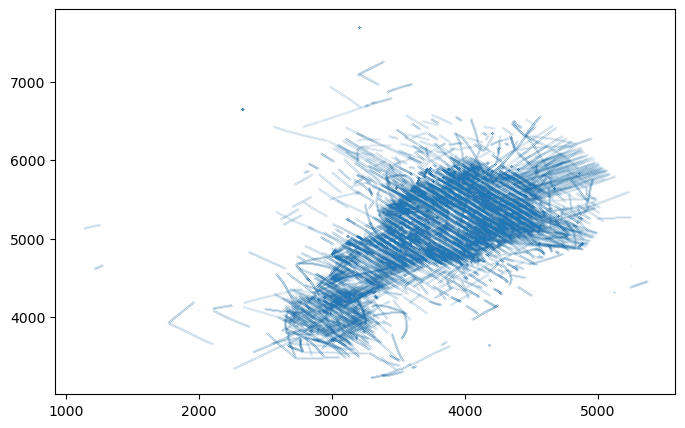

In [22]:
df_CLAG_MR= pd.read_csv(param[2])


n = len(df_CLAG_MR)
x = df_CLAG_MR.iloc[:,1]
y = df_CLAG_MR.iloc[:,2]
plt.figure(figsize=(8,5))
plt.plot(x,y,'o',markersize=0.015)
plt.show()

### PUNTO EN POLIGONO

In [23]:

def punto_en_poligono(x, y, poligono):
    i = 0
    j = len(poligono) - 1
    salida = False       ## FLAG EN NEGATIVO <--
    for i in range(len(poligono)):
        if (poligono[i][1] <= y and poligono[j][1] >= y) or (poligono[j][1] <= y and poligono[i][1] >= y):
            if poligono[i][0] + (y - poligono[i][1]) / (poligono[j][1] - poligono[i][1]) * (poligono[j][0] - poligono[i][0]) <= x:
                salida = not salida
        j = i
    return salida 

punto_en_poligono(1,2, [(-1,4),(1,5),(1,1),(3,2)])

True

### Modulo Angulos internos azimutal a cartesiano


In [24]:



#def tranformar_angulo(g):
 
#entrada ejemplo:

azimuth=0             ## <------    ## <------   ## <------ 
cartesiana=0          ## <------ 


if azimuth < 90:
    
    print(1)
    cartesiana=90-azimuth 
    print(cartesiana)
    
elif azimuth < 180:
    print(2)
    cartesiana=360-(azimuth-90) 
    print(cartesiana)
    
elif azimuth < 270:
    print(3)
    cartesiana=270-(azimuth-180) 
    print(cartesiana)
    
    
elif azimuth < 360:
    print(4)
    cartesiana=180-(azimuth-270) 
    print(cartesiana)

    
    
math.radians(cartesiana)    ## <------  APLICAR ACA SIN COS etc etc


1
90


1.5707963267948966

### TEST REPRESENTACION 2D


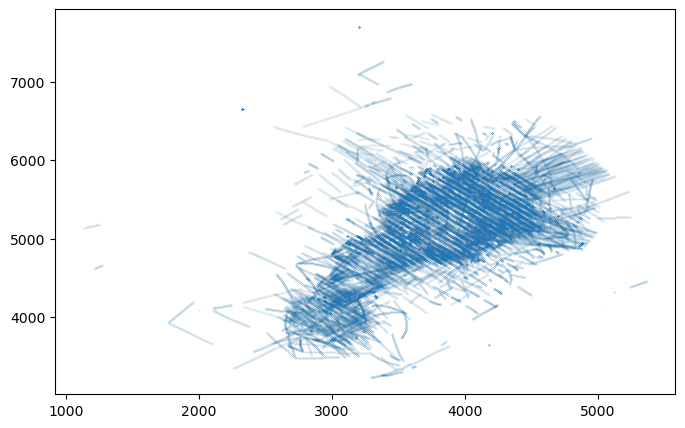

(6557.7603, 7164.1386)

In [26]:


plt.figure(figsize=(8,5))
plt.plot(x,y,'.',markersize=0.025)
plt.show()

x = df_CLAG_MR_2022.iloc[:,1]
y = df_CLAG_MR_2022.iloc[:,2]

x.min(), x.max()

y.min(), y.max()

### TEST REPRESENTACION    _3D



In [41]:
x = df_CLAG_MR_2022.iloc[:,1]
x

127031    3195.3522
127032    3196.0754
127033    3196.6902
127133    3271.5393
128456    3325.1017
128460    3328.3971
128468    3335.5516
128536    3396.6945
128537    3397.6048
128538    3398.5151
128539    3399.4254
128540    3400.3432
129258    3034.5495
129259    3032.6590
129269    3015.1840
129270    3013.3185
Name: mid_x, dtype: float64

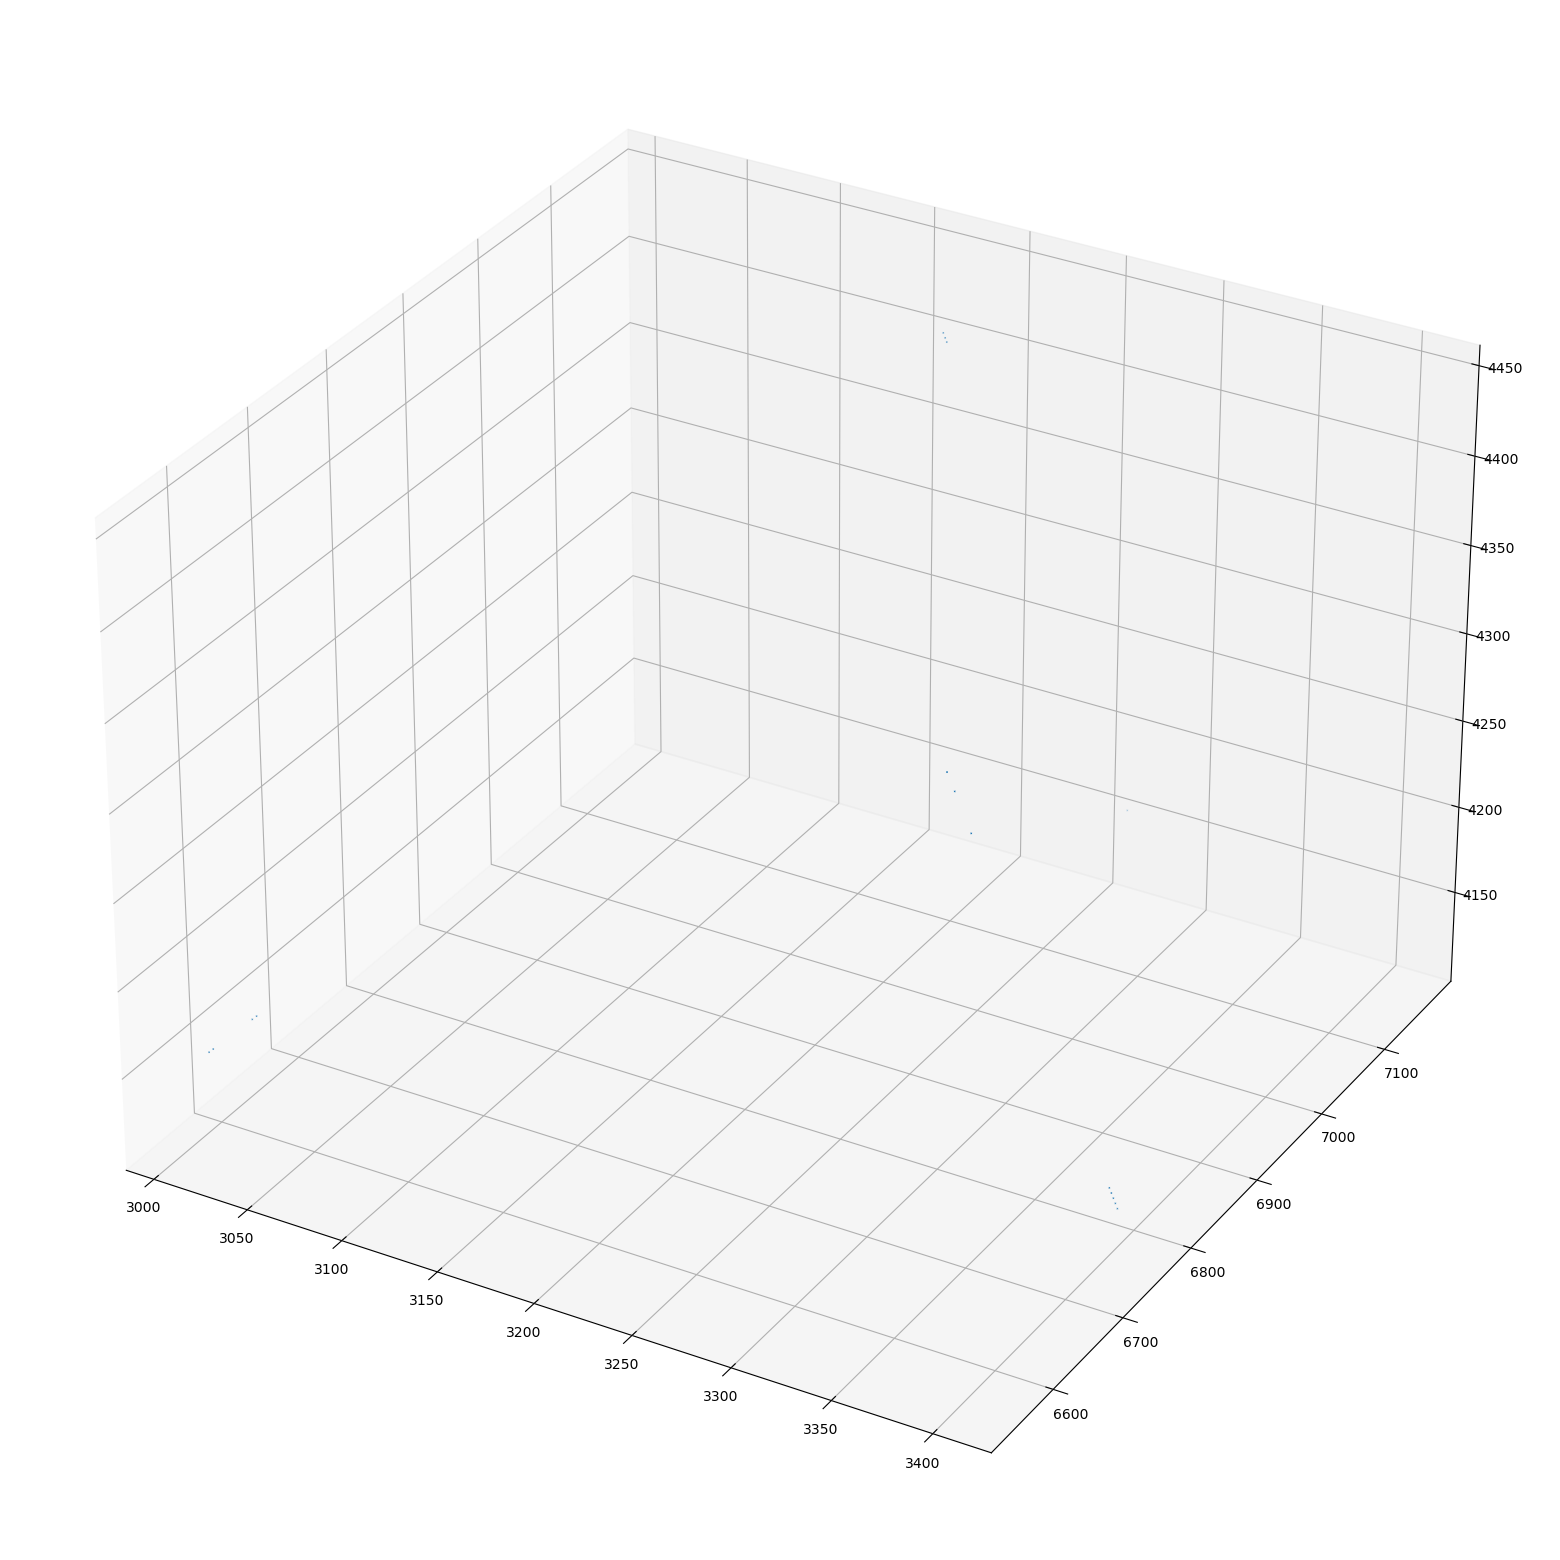

In [45]:


fig = plt.figure(figsize = (20,20))
ax = plt.axes(projection='3d')



x = df_CLAG_MR_2022.iloc[:,1]
y = df_CLAG_MR_2022.iloc[:,2]
z = df_CLAG_MR_2022.iloc[:,3]

ax.scatter3D(x, y, z, marker='x',s=0.1)


### TEST REPRESENTACION    _3D     .       ANGULO FIJO

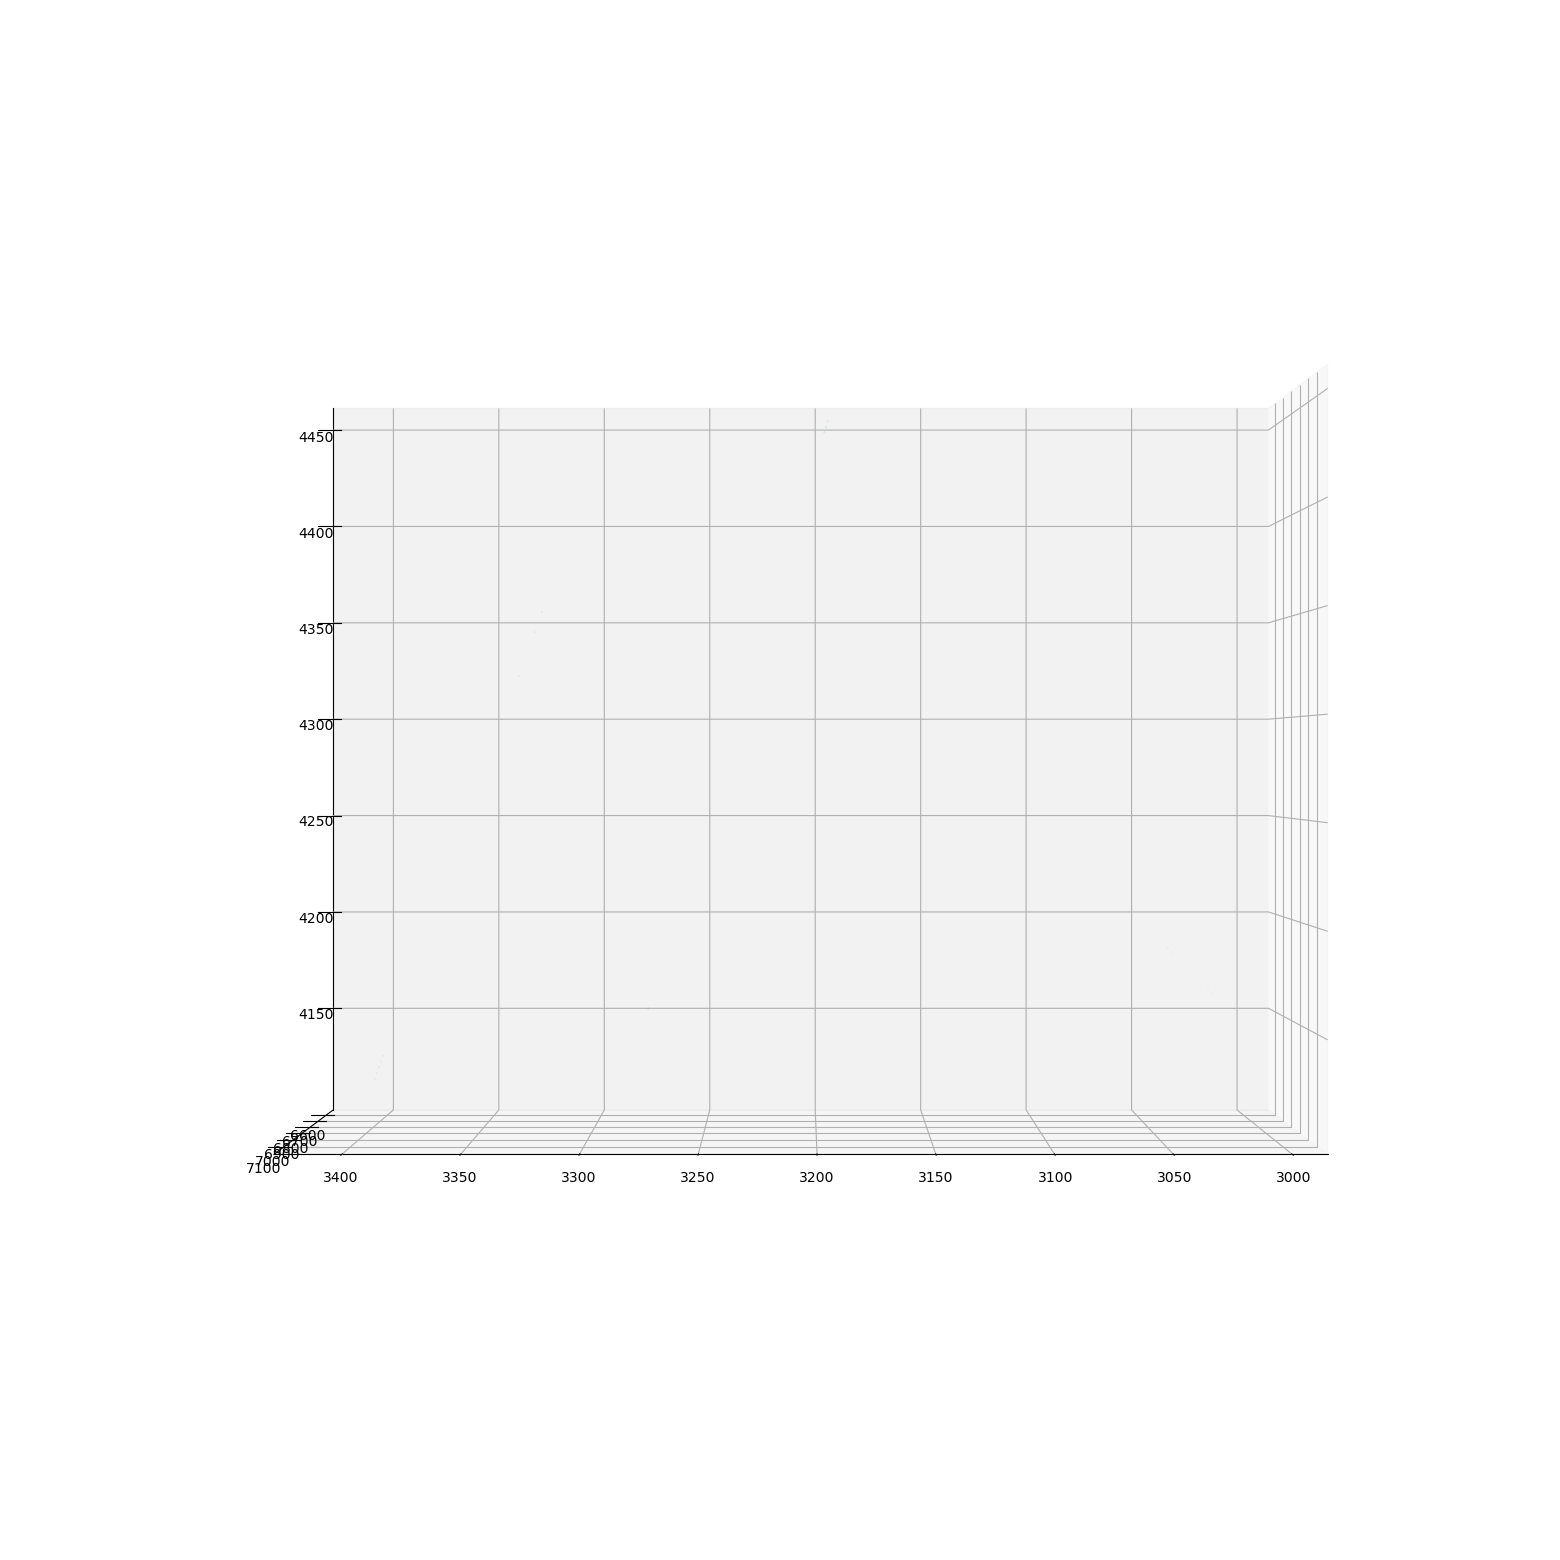

In [28]:
fig = plt.figure(figsize = (20,20))
ax = plt.axes(projection='3d')



x = df_CLAG_MR_2022.iloc[:,1]
y = df_CLAG_MR_2022.iloc[:,2]
z = df_CLAG_MR_2022.iloc[:,3]

ax.scatter3D(x, y, z, marker='o',s=0.005)
ax.view_init(0, 90)            ## seguna coordenada PARA MOV 
plt.show()

### TEST ROTACIONES  -V1.

In [31]:
df_parametros.Valor

df_parametros.Valor[3]

df_parametros.Valor[14][1]

x=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,1][obs]
y=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,2][obs]

x,y

x_SI= x - (df_parametros.Valor[3][1] / 2)
y_SI= y + ((df_parametros.Valor[3][2]*ratio) / 2)

x_II= x - (df_parametros.Valor[3][1] / 2)
y_II= y - ((df_parametros.Valor[3][2]*ratio) / 2)

x_SD= x + (df_parametros.Valor[3][1] / 2)
y_SD= y + ((df_parametros.Valor[3][2]*ratio) / 2)

x_ID= x + (df_parametros.Valor[3][1] / 2)
y_ID= y - ((df_parametros.Valor[3][2]*ratio) / 2)

print(x,y)
print(x_SI,y_SI)
print(x_II,y_II)
print(x_SD,y_SD)
print(x_ID,y_ID)



y_SI-y_II,y_SD-y_ID   ### DISTANCIA ENTRE y

x_SI-x_ID,x_SI-x_ID   ### DISTANCIA ENTRE x

azimuth=45
azimuth

cartesiana=45
cartesiana

rad=math.radians(cartesiana)
rad

np.cos(rad)

np.sin(rad)

x_SI_r= x_SI*np.cos(rad)- y_SI*np.sin(rad) 
y_SI_r= y_SI*np.cos(rad)+ x_SI*np.sin(rad)

x_II_r= x_II*np.cos(rad)- y_II*np.sin(rad)
y_II_r= y_II*np.cos(rad)+ x_II*np.sin(rad)

x_SD_r= x_SD*np.cos(rad)- y_SD*np.sin(rad)
y_SD_r= y_SD*np.cos(rad)+ x_SD*np.sin(rad)

x_ID_r= x_ID*np.cos(rad)- y_ID*np.sin(rad)
y_ID_r= y_ID*np.cos(rad)+ x_ID*np.sin(rad)

print(x_SI_r,y_SI_r)
print(x_II_r,y_II_r)
print(x_SD_r,y_SD_r)
print(x_ID_r,y_ID_r)

from math import dist
dist((1,2),(2,2))

dist((x_SI_r,y_SI_r),(x_II_r,y_II_r))

NameError: name 'rock' is not defined

In [32]:
x1=[x,x_SI,x_II,x_SD,x_ID]
y1=[y,y_SI,y_II,y_SD,y_ID]

plt.plot(x1,y1, "o")
plt.show()


x2=[x_SI_r,x_II_r,x_SD_r,x_ID_r]
y2=[y_SI_r,y_II_r,y_SD_r,y_ID_r]

plt.plot(x2,y2, "x")
plt.show()


x3=[x_SI,x_II,x_SD,x_ID,x_SI_r,x_II_r,x_SD_r,x_ID_r]
y3=[y_SI,y_II,y_SD,y_ID,y_SI_r,y_II_r,y_SD_r,y_ID_r]

plt.plot(x3,y3, "o")
plt.show()

NameError: name 'x_SI' is not defined

### TEST ROTACION V2.

In [33]:
print(x,y)
print(x_SI,y_SI)
print(x_II,y_II)
print(x_SD,y_SD)
print(x_ID,y_ID)

127031    3195.3522
127032    3196.0754
127033    3196.6902
127133    3271.5393
128456    3325.1017
128460    3328.3971
128468    3335.5516
128536    3396.6945
128537    3397.6048
128538    3398.5151
128539    3399.4254
128540    3400.3432
129258    3034.5495
129259    3032.6590
129269    3015.1840
129270    3013.3185
Name: mid_x, dtype: float64 127031    7094.2962
127032    7095.0583
127033    7095.7060
127133    7164.1386
128456    6737.0931
128460    6738.7070
128468    6742.2024
128536    6771.7115
128537    6772.1448
128538    6772.5777
128539    6773.0104
128540    6773.4464
129258    6569.5045
129259    6568.4575
129269    6558.7909
129270    6557.7603
Name: mid_y, dtype: float64


NameError: name 'x_SI' is not defined

In [ ]:
x_ang_SI=x_SI-x
y_ang_SI=y_SI-y

print(x_ang_SI,y_ang_SI)

angle_SI = math.atan2(y_ang_SI, x_ang_SI) * (180.0 / math.pi)
angle_SI

x_ang_II=x_II-x
y_ang_II=y_II-y

print(x_ang_II,y_ang_II)

angle_II = math.atan2(y_ang_II, x_ang_II) * (180.0 / math.pi)
angle_II

x_ang_SD=x_SD-x
y_ang_SD=y_SD-y

print(x_ang_SD,y_ang_SD)

angle_SD = math.atan2(y_ang_SD, x_ang_SD) * (180.0 / math.pi)
angle_SD

x_ang_ID=x_ID-x
y_ang_ID=y_ID-y

print(x_ang_ID,y_ang_ID)

angle_ID = math.atan2(y_ang_ID, x_ang_ID) * (180.0 / math.pi)
angle_ID

#######        

x_SI= x - (df_parametros.Valor[3][1] / 2)
y_SI= y + ((df_parametros.Valor[3][2]*ratio) / 2)

x_II= x - (df_parametros.Valor[3][1] / 2)
y_II= y - ((df_parametros.Valor[3][2]*ratio) / 2)

x_SD= x + (df_parametros.Valor[3][1] / 2)
y_SD= y + ((df_parametros.Valor[3][2]*ratio) / 2)

x_ID= x + (df_parametros.Valor[3][1] / 2)
y_ID= y - ((df_parametros.Valor[3][2]*ratio) / 2)

print(x,y)
print(x_SI,y_SI)
print(x_II,y_II)
print(x_SD,y_SD)
print(x_ID,y_ID)


print(angle_SI)
print(angle_II)
print(angle_SD)
print(angle_ID)

math.radians(angle_SI)
math.radians(angle_II)
math.radians(angle_SD)
math.radians(angle_ID)

## ROTAR A 30°

cartesiana=30

rad=math.radians(cartesiana)

x_SI_r= x_SI*np.cos(rad+math.radians(angle_SI))- y_SI*np.sin(rad+math.radians(angle_SI)) 
y_SI_r= y_SI*np.cos(rad+math.radians(angle_SI))+ x_SI*np.sin(rad+math.radians(angle_SI))

x_II_r= x_II*np.cos(rad+math.radians(angle_II))- y_II*np.sin(rad+math.radians(angle_II))
y_II_r= y_II*np.cos(rad+math.radians(angle_II))+ x_II*np.sin(rad+math.radians(angle_II))

x_SD_r= x_SD*np.cos(rad+math.radians(angle_SD))- y_SD*np.sin(rad+math.radians(angle_SD))
y_SD_r= y_SD*np.cos(rad+math.radians(angle_SD))+ x_SD*np.sin(rad+math.radians(angle_SD))

x_ID_r= x_ID*np.cos(rad+math.radians(angle_ID))- y_ID*np.sin(rad+math.radians(angle_ID))
y_ID_r= y_ID*np.cos(rad+math.radians(angle_ID))+ x_ID*np.sin(rad+math.radians(angle_ID))

x1=[x_SI,x_II,x_SD,x_ID]
y1=[y_SI,y_II,y_SD,y_ID]

plt.plot(x1,y1, "o")
plt.show()


x2=[x_SI_r,x_II_r,x_SD_r,x_ID_r]
y2=[y_SI_r,y_II_r,y_SD_r,y_ID_r]

plt.plot(x2,y2, "o")
plt.show()


x3=[x_SI,x_II,x_SD,x_ID,x_SI_r,x_II_r,x_SD_r,x_ID_r]
y3=[y_SI,y_II,y_SD,y_ID,y_SI_r,y_II_r,y_SD_r,y_ID_r]

plt.plot(x3,y3, "o")
plt.show()

x_SI,y_SI

math.radians(angle_SI)

x_SI_r= 1*np.cos(rad+math.radians(angle_SI))- 1*np.sin(rad+math.radians(angle_SI)) 
y_SI_r= y_SI*np.cos(rad+math.radians(angle_SI))+ x_SI*np.sin(rad+math.radians(angle_SI))

x_SI_r,y_SI_r

math.cos(45*math.pi/180)

### TEST ROTACION V3.     

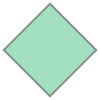

In [35]:
from shapely.geometry import Point, LineString, Polygon
s = gpd.GeoSeries([Polygon([(2, 2), (2, 4), (4, 4), (4, 2)])])
s
s.rotate(45, origin=(0, 0))[0]

In [36]:
from shapely.geometry import Point, LineString, Polygon
s = gpd.GeoSeries([Polygon([(2, 2), (2, 4), (4, 4), (4, 2)])])
s


x,y = s.rotate(46, origin=(3,3))[0].exterior.coords.xy
coords = np.dstack((x,y)).tolist()

coords

[[[3.024681429879654, 1.5860018292023512],
  [1.5860018292023514, 2.9753185701203457],
  [2.975318570120346, 4.4139981707976474],
  [4.413998170797648, 3.0246814298796534],
  [3.024681429879654, 1.5860018292023512]]]

In [37]:
for i in range(100):
    x,y = s.rotate(i, origin=(3,3))[0].exterior.coords.xy
    coords = np.dstack((x,y)).tolist()
    print(coords)
    print(i)
    print(" ")
    

[[[2.0, 2.0], [2.0, 4.0], [4.0, 4.0], [4.0, 2.0], [2.0, 2.0]]]
0
 
[[[2.017604711280892, 1.9826998984063247], [1.9826998984063249, 3.982395288719107], [3.9823952887191076, 4.0173001015936745], [4.0173001015936745, 2.017604711280892], [2.017604711280892, 1.9826998984063247]]]
1
 
[[[2.0355086696834053, 1.9657096762784034], [1.9657096762784034, 3.9644913303165947], [3.964491330316595, 4.0342903237215975], [4.034290323721597, 2.0355086696834053], [2.0355086696834053, 1.9657096762784034]]]
2
 
[[[2.05370642148837, 1.949034509002482], [1.949034509002482, 3.94629357851163], [3.94629357851163, 4.050965490997518], [4.050965490997518, 2.0537064214883696], [2.05370642148837, 1.949034509002482]]]
3
 
[[[2.072192423484301, 1.9326794759960508], [1.9326794759960508, 3.927807576515699], [3.9278075765156992, 4.06732052400395], [4.06732052400395, 2.072192423484301], [2.072192423484301, 1.9326794759960508]]]
4
 
[[[2.0909610446559124, 1.916649559160596], [1.916649559160596, 3.909038955344087], [3.909038

###  INTERSECC

In [15]:
x,y = s[0].exterior.coords.xy
all_coords = np.dstack((x,y)) ####


for interior in s[0].interiors: # for first feature/row
    x, y = interior.coords.xy
    coords = np.dstack((x,y))
    all_coords = np.append(all_coords, coords, axis=0)

all_coords  # or all_coords.tolist()


array([[[4458.6607, 6411.5579],
        [4458.6607, 6336.5579],
        [4488.6607, 6411.5579],
        [4488.6607, 6336.5579],
        [4458.6607, 6411.5579]]])